In [ ]:
import seaborn as sns
import numpy as np
import pandas
import matplotlib.pyplot as plt
data = pandas.read_csv("ai_job_dataset.csv")
data.head()
#test

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [17]:
data.describe().transpose

<bound method DataFrame.transpose of           salary_usd  remote_ratio  years_experience  job_description_length  \
count   15000.000000  15000.000000      15000.000000            15000.000000   
mean   115348.965133     49.483333          6.253200             1503.314733   
std     60260.940438     40.812712          5.545768              576.127083   
min     32519.000000      0.000000          0.000000              500.000000   
25%     70179.750000      0.000000          2.000000             1003.750000   
50%     99705.000000     50.000000          5.000000             1512.000000   
75%    146408.500000    100.000000         10.000000             2000.000000   
max    399095.000000    100.000000         19.000000             2499.000000   

       benefits_score  True_salary_usd  
count    15000.000000     15000.000000  
mean         7.504273    120690.034733  
std          1.450870     64522.267517  
min          5.000000     32519.000000  
25%          6.200000     72916.50000

In [22]:
data.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,True_salary_usd
0,AI00001,3,90376,USD,SE,CT,3,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,0,2024-10-18,2024-11-07,1076,5.9,14,90376
1,AI00002,4,61895,USD,EN,CT,2,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,9,2024-11-20,2025-01-11,1268,5.2,15,61895
2,AI00003,5,152626,USD,MI,FL,17,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,2,2025-03-18,2025-04-07,1974,9.4,3,152626
3,AI00004,16,80215,USD,SE,FL,8,M,India,50,"Scala, SQL, Linux, Python",PhD,7,1,2024-12-23,2025-02-24,1345,8.6,9,80215
4,AI00005,1,54624,EUR,EN,PT,6,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,9,2025-04-15,2025-06-23,1989,6.6,1,63591


In [28]:
data["years_experience"].unique()

array([ 9,  1,  2,  7,  0,  3,  5,  8, 15,  6,  4, 16, 10, 18, 12, 19, 17,
       13, 11, 14])

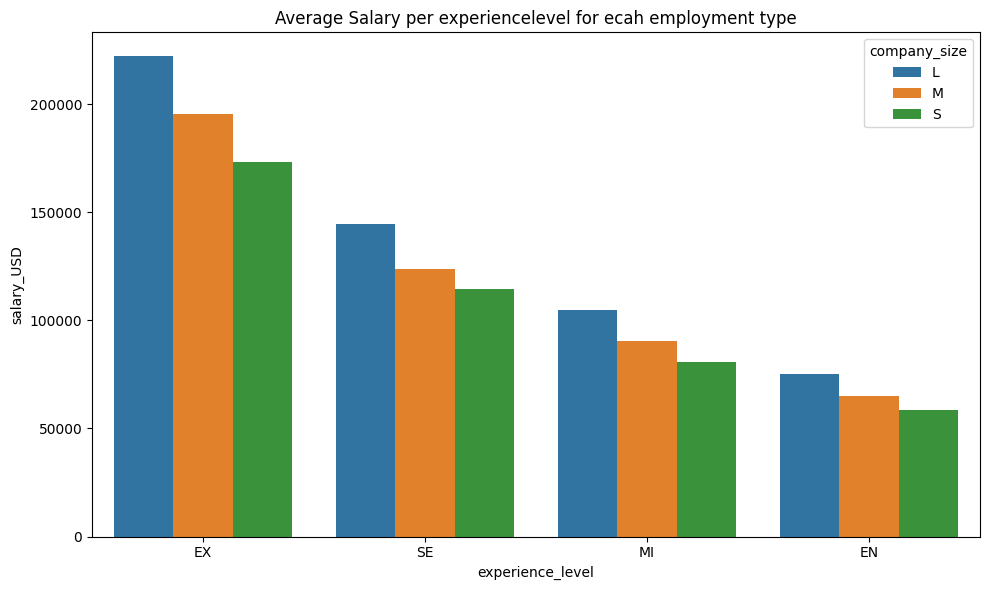

In [34]:
plot=data.groupby(['experience_level','company_size'])[['True_salary_usd']].mean().sort_values("True_salary_usd",ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=plot,x='experience_level',y='True_salary_usd',hue='company_size')
plt.title('Average Salary per experiencelevel for ecah employment type')

plt.ylabel('salary_USD')
plt.tight_layout()

<Axes: xlabel='experience_level', ylabel='True_salary_usd'>

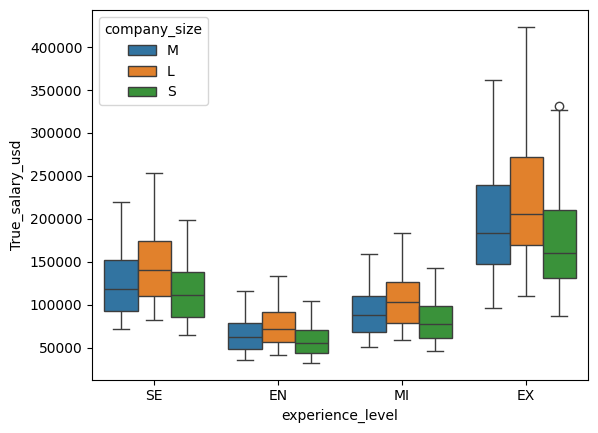

In [35]:
sns.boxplot(data=data,x='experience_level',y='True_salary_usd',hue='company_size')

In [45]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
le=LabelEncoder()
data['job_title']=le.fit_transform(data['job_title'])
data['company_location']=le.fit_transform(data['company_location'])
data['industry']=le.fit_transform(data['industry'])
data['company_name']=le.fit_transform(data['company_name'])

dummis=pd.get_dummies(data[['experience_level','company_size']],drop_first=True)
data=pd.concat([data,dummis],axis=1)
data=data.drop(['job_id','job_description_length'],axis=1)


KeyError: "['job_id' 'job_description_length'] not found in axis"

In [ ]:
data['Days_to_apply']=data['application_deadline'].astype(int)-data['posting_date'].astype(int)

NameError: name 'data' is not defined

In [66]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
train=data.drop('True_salary_usd',axis=1)
test=data['True_salary_usd']
x_train,x_test,y_train,y_test=train_test_split(train,test,random_state=42,test_size=.2)
model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500)
model.fit(x_train, y_train)
# Evaluate prediction errors
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE (Mean Absolute Error): 7676.4476
RMSE (Root Mean Squared Error): 12518.2532
R² Score: 0.9623


In [67]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, train, test, scoring='neg_root_mean_squared_error', cv=kf)

print(f"Average RMSE (CV): {np.abs(scores.mean()):.4f}")

Average RMSE (CV): 12821.5812


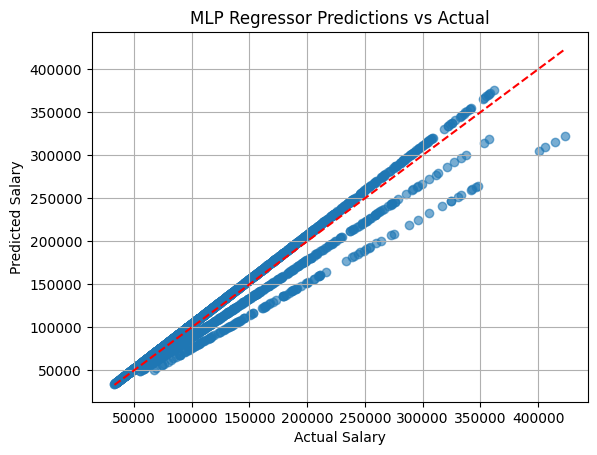

In [68]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("MLP Regressor Predictions vs Actual")
plt.grid(True)
plt.show()

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (64, 64, 32)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(MLPRegressor(max_iter=500), param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'alpha': 0.001, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001}


In [71]:
final_model = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

final_model.fit(x_train, y_train)
y_pred_final = final_model.predict(x_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 8497.74
RMSE: 12509.70
R² Score: 0.9623


In [13]:
map_currency = {"USD" : 1,
              "EUR" : 1.17,
              "GBP"  : 1.37}
data["true_salary"] = data["salary_usd"] * data["salary_currency"].map(map_currency).astype(int)

data

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,true_salary
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,90376
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,61895
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,152626
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,80215
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,54624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics,38604
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics,57811
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations,189490
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics,79461


<Axes: xlabel='true_salary', ylabel='company_name'>

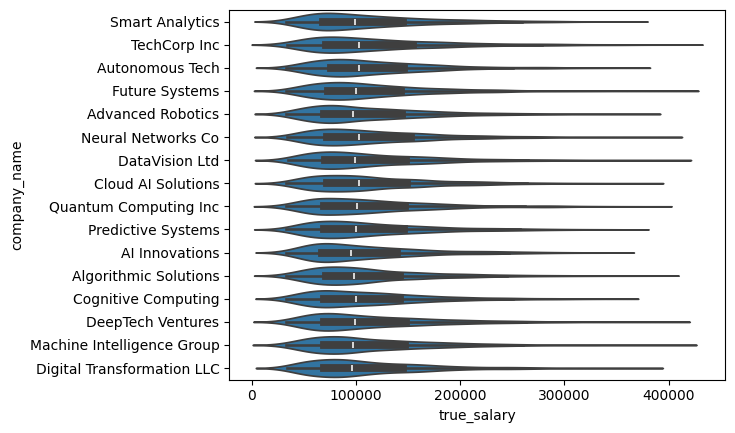

In [ ]:

c

In [ ]:
data['application_deadline']=pd.to_datetime(data['application_deadline'])
data['posting_date'] = pd.to_datetime(data['posting_date'])

data['Days_to_apply']=data['application_deadline']-data['posting_date']
data.head()

In [ ]:
data['required_skill'] = data['required_skill'].str.split(',\s*')  # split and remove whitespace
mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(data['required_skill'])

skills_df = pd.DataFrame(skills_encoded, columns=mlb.classes_)
df_final = pd.concat([data.drop(columns='required_skill'), skills_df], axis=1)

array(['China', 'Ireland', 'South Korea', 'India', 'Singapore', 'Germany',
       'United Kingdom', 'France', 'Austria', 'Sweden', 'Norway',
       'Israel', 'United States', 'Netherlands', 'Denmark', 'Switzerland',
       'Finland', 'Japan', 'Canada', 'Australia'], dtype=object)